## Tutorial 1: Basic quantum circuits
In this tutorial, you will learn:
* _How to construct, run and measure simple quantum circuits using the Quil language_

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

In [1]:
%matplotlib inline
!pip install --upgrade https://github.com/rigetticomputing/pyquil/archive/master.zip matplotlib

     - 45.0MB 19.7MB/s
Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: numpy in /opt/conda/lib/python3.6/site-packages (from pyquil==2.0.0.dev0)
Requirement already up-to-date: antlr4-python3-runtime in /opt/conda/lib/python3.6/site-packages (from pyquil==2.0.0.dev0)
Requirement already up-to-date: requests in /opt/conda/lib/python3.6/site-packages (from pyquil==2.0.0.dev0)
Requirement already up-to-date: contextvars in /opt/conda/lib/python3.6/site-packages (from pyquil==2.0.0.dev0)
Requirement already up-to-date: six in /opt/conda/lib/python3.6/site-packages (from pyquil==2.0.0.dev0)
Requirement already up-to-date: python-dateutil>=2.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: kiwisolver>=1.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
Requiremen

In [2]:
from pyquil.quil import Program
from pyquil.api import QVMConnection

In [3]:
import os

API_KEY = ''
USER_ID = ''

PYQUIL_CONFIG = f"""
[Rigetti Forest]
url: https://api.rigetti.com/qvm
key: {API_KEY}
user_id: {USER_ID}
"""

with open(os.path.expanduser('~/.pyquil_config'), 'w') as f:
    f.write(PYQUIL_CONFIG)

In [3]:
def execute(quil_program, trials=100, silent=False, raw=False):
    """
    Thin function that takes a low-level Quil program and returns the
    resulting probability distribution.
    """

    qvm = QVMConnection()
    results = qvm.run(Program(quil_program), trials=trials)
    results = list(map(tuple, results))

    if not silent:
        observed_results = set(results)
        for result in sorted(observed_results):
            bitstring = ''.join(reversed(list(map(str, result))))
            print(f'|{bitstring}> state: {results.count(result)/len(results)} [{results.count(result)}/{len(results)}]')
        if raw:
            print(f'Results: {results}')

def plot(quil_program):
    qvm = QVMConnection()
    return qvm.wavefunction(Program(quil_program)).plot()    

# Quantum Computing refresher

## Qubit

The carrier of information in the quantum computing circuits is the qubit, usually denoted in the Dirac notation as

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

$$ \ket{\psi} = \alpha \ket{0}  + \beta \ket{1} $$ 

where

$$ \alpha,\beta \in \mathbb{C} $$

and

$$
\ket{0} = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}, \,\,\, \ket{1} = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
$$


## Quantum gates and measurement

Quantum circuits are composed of two fundamental building blocks - quantum gates and the measurement operation. Here we introduce a couple of single-qubit gates (operating on one qubit).

### X gate

X gate serves like a quantum version of the NOT operator - it flips probability coefficients between the |0> and |1> state of the qubit it is applied to.

$$
X = 
\begin{bmatrix}
    0 & 1 \\
    1 & 0 \\
\end{bmatrix}
$$

In the Quil language, we implement X as:

```
X <qubit>
```

The statement above applies X gate to qubit `<qubit>` i.e.

```
X 2
```

applies the X gate on qubit 2.


### Measurement operation

To read out the state of the qubit, we *measure* it, which forces it to collapse to one of its basis states.

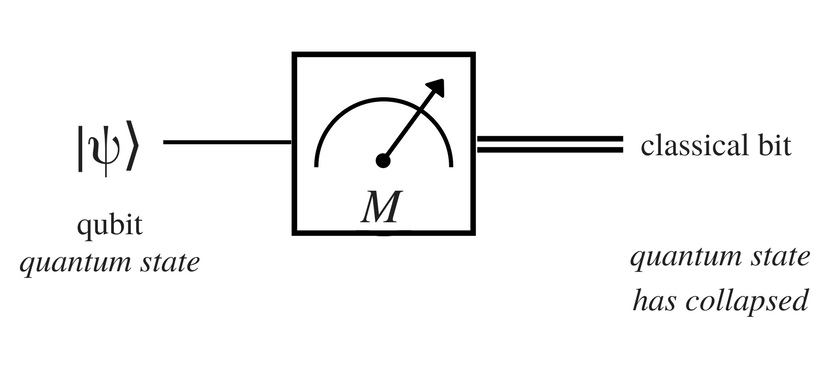

To measure a qubit, we use a `MEASURE` operation with the following syntax:

```
MEASURE <qubit> [<register>]
```

where `<qubit>` is the qubit number and `<register>` is the index of the classical register to store the measurement result in.

#### Exercise 1.1

Qubits in the circuits are always initialized to the same state. Conduct an experiment to figure out what is the initial state of the qubits in the simulator.

In [64]:
execute("""
MEASURE 0 [0]
""")

|0> state: 1.0 [100/100]


#### Exercise 1.2

Create a quantum circuit that always produces state $\ket{01}$.

In [65]:
execute("""
X 0
MEASURE 0 [0]
MEASURE 1 [1]
""")

|01> state: 1.0 [100/100]


### H gate

H gate is often used to put basis states into uniform superposition:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
    1 & 1 \\
    -1 & 1 \\
\end{bmatrix}
$$

Similiar to X gate (or any single qubit gate, really), we implement H as:

```
H <qubit>
```

#### Exercise 1.3

Figure out what is the problem with the following circuit and implement a fix.

In [66]:
execute("""
H 0
MEASURE 0
""")

#### Exercise 1.4

Finish the following circuit (don't modify existing instructions) to obtain 50% of state |00> and 50% of state |10>. Use only MEASURE instructions.

In [67]:
execute("""
H 1
MEASURE 0 [1]
MEASURE 1 [0]
""")

|00> state: 0.6 [60/100]
|01> state: 0.4 [40/100]


#### Exercise 1.5

Plot a wavefunction of the program above. Why does it look different than the sample distribution? What program should we plot to mirror the sample distribution above?

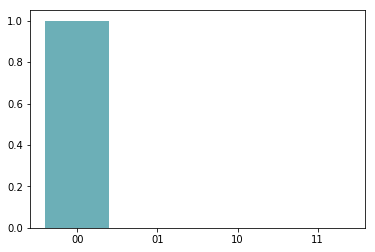

In [68]:
plot("""
H 1
MEASURE 0 [1]
MEASURE 1 [0]
""")

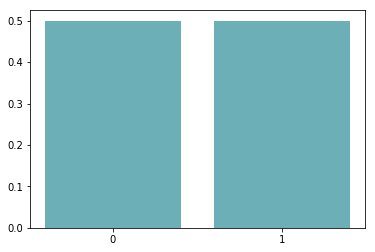

In [69]:
plot("""
H 1
""")

#### Exercise 1.6

Implement a fair quantum 8-sided dice.

In [15]:
execute("""
H 0
H 1
H 2
MEASURE 0 [0]
MEASURE 1 [1]
MEASURE 2 [2]
""", trials=100000)

|000> state: 0.12584 [12584/100000]
|100> state: 0.12526 [12526/100000]
|010> state: 0.12487 [12487/100000]
|110> state: 0.12531 [12531/100000]
|001> state: 0.12345 [12345/100000]
|101> state: 0.12548 [12548/100000]
|011> state: 0.12353 [12353/100000]
|111> state: 0.12626 [12626/100000]



### C-Not gate

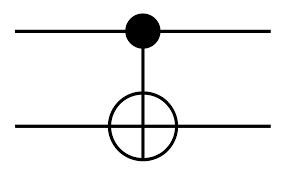


$CNOT$ gate is the first 2-qubit gate we encounter. This gate applies the NOT operation to the second qubit only if the first qubit is $\ket{1}$.

$$
CNOT = 
\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0\\
\end{bmatrix}
$$

In the Quil language, we implement X as:

```
CNOT <qubit> <control_qubit>
```

#### Exercise 1.7

Implement a circuit that acts like C-NOT gate controlled by the value 0, that is, second qubit is flipped only if first qubit is 0. Test this circuit on initial states $\ket{00}$ and $\ket{01}$.

In [17]:
execute("""
X 0
CNOT 0 1
X 0
MEASURE 0 [0]
MEASURE 1 [1]
""")

|10> state: 1.0 [100/100]


In [18]:
execute("""
X 0

X 0
CNOT 0 1
X 0
MEASURE 0 [0]
MEASURE 1 [1]
""")

|01> state: 1.0 [100/100]


#### Exercise 1.8

Construct an entangled pair of qubits (a pair of qubits that always collapses to the same basis state when measured).

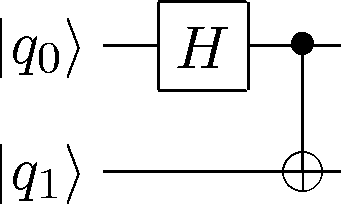

In [72]:
execute("""
H 0
CNOT 0 1
MEASURE 0 [0]
MEASURE 1 [1]
""")

|00> state: 0.52 [52/100]
|11> state: 0.48 [48/100]


#### Exercise 1.9

Construct a quantum circuit that yields the following distribution of states:


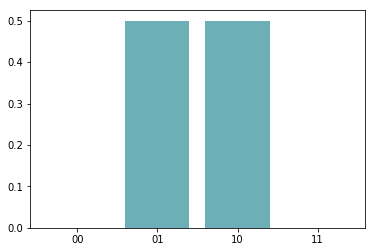

### Bonus exercises

#### Exercise 1.10

Implement a fair quantum 7-sided dice. <a href="http://docs.rigetti.com/en/latest/advanced_usage.html#classical-control-flow">Hint</a>

In [12]:
execute("""
LABEL @START
H 0
H 1
H 2
MEASURE 0 [0]
MEASURE 1 [1]
MEASURE 2 [2]
JUMP-WHEN @FINISH [0]
JUMP-WHEN @FINISH [1]
JUMP-WHEN @FINISH [2]
JUMP @START
LABEL @FINISH
""", trials=100000)

|100> state: 0.14117 [14117/100000]
|010> state: 0.14383 [14383/100000]
|110> state: 0.14191 [14191/100000]
|001> state: 0.14246 [14246/100000]
|101> state: 0.14345 [14345/100000]
|011> state: 0.14307 [14307/100000]
|111> state: 0.14411 [14411/100000]


#### Exercise 1.11

Implement a circuit for quantum teleportation and successfully teleport a qubit. In this solution, we are teleporting $\ket{1}$, feel free to replace the first instruction with any sequence of single-qubit gates.

In [31]:
execute("""
X 0

H 1
CNOT 1 2
CNOT 0 1
H 0
MEASURE 0 [0]
MEASURE 1 [1]
JUMP-WHEN @CASE1 [1]
LABEL @FORK2
JUMP-WHEN @CASE2 [0]
JUMP @FINISH
LABEL @CASE1
X 2
JUMP @FORK2
LABEL @CASE2
Z 2
JUMP @FINISH
LABEL @FINISH
MEASURE 2 [2]
""")

|100> state: 0.2 [20/100]
|110> state: 0.17 [17/100]
|101> state: 0.26 [26/100]
|111> state: 0.37 [37/100]
